## Explora Data and Cleaning Data

Mean length of the words:  9.347760668719754
Standard deviation of the length of the words:  2.981241985260055
Lowest length to 3 standard deviations from the mean:  3.385276698199644
Highest length to 3 standard deviations from the mean:  15.310244639239865
Current length of the dataframe:  227300
New length of the dataframe:  220403


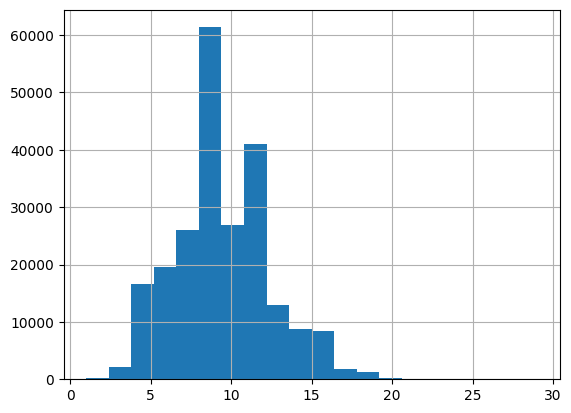

In [35]:
# Load dataset in a pandas dataframe
import pandas as pd

# Load the dataset
raw_word_list = []
with open('data/words_250000_train.txt', 'r') as f:
    for line in f:
        raw_word_list.append(line.strip())

# Create a pandas dataframe with type string
df = pd.DataFrame(raw_word_list, columns=['word'])

# Convert to lowercase
df['word'] = df['word'].str.lower()

# Filter out non-alphabetic entries and remove special characters
df = df[df['word'].str.match(r'^[a-zA-Z]+$')]

# Remove duplicates
df = df.drop_duplicates()

# Add a column with the length of the word
df['length'] = df['word'].apply(len)

# Add a column with the number of unique characters in the word
df['unique'] = df['word'].apply(lambda x: len(set(x)))

# Plot the histogram of the length of the words
df['length'].hist(bins=20)

# Calculate the mean and the standard deviation of the length of the words
mean_length = df['length'].mean()
std_length = df['length'].std()

# Calculate what is the lowest and highest length to 3 standard deviations from the mean
lowest_length = mean_length - 2*std_length
highest_length = mean_length + 2*std_length

# Print the results 
print('Mean length of the words: ', mean_length)
print('Standard deviation of the length of the words: ', std_length)
print('Lowest length to 3 standard deviations from the mean: ', lowest_length)
print('Highest length to 3 standard deviations from the mean: ', highest_length)

# NOTE: to two standard deviations from the mean
# The lowest is 3.389 and highest is 15.310
# I can choose filter length from 3 to 15
# Filter out words with length less than 3 and more than 15
df1 = df[(df['length'] >= 3) & (df['length'] <= 15)]

# Print length change
print('Current length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1 


Current length of the dataframe:  220403
New length of the dataframe:  220028


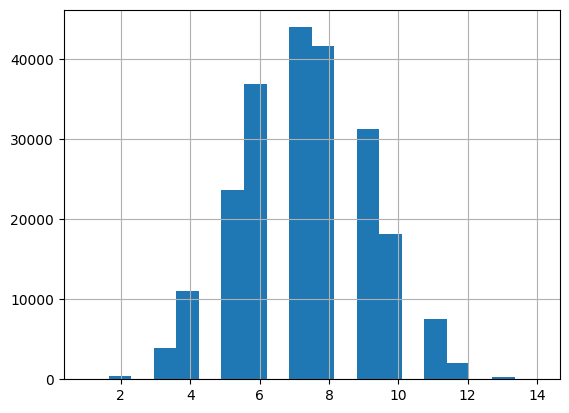

In [36]:
# Plot the histogram of the number of unique characters in the words
df['unique'].hist(bins=20)

# Filter out words with less than 3 unique characters
df1 = df[df['unique'] >= 3]

# Print length change
print('Current length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

Current length of the dataframe:  220028
New length of the dataframe:  218497


<Axes: >

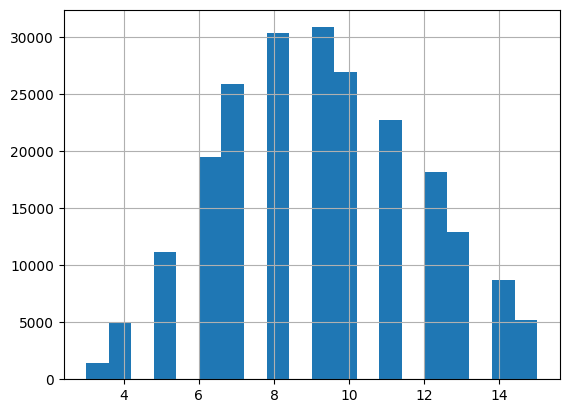

In [37]:
import re

# Rules for invalid words
def is_invalid_word(word):
    # Rule 1: Repeated characters (e.g., "aaaaa")
    # More than 3 times the same letter
    if re.search(r"(.)\1{2,}", word):
        return True
    # Rule 2: No vowels or semi-vowel (y)
    if re.match(r"^[^aeiouy]+$", word, re.IGNORECASE):
        return True
    
    # Rule 3: Uncommon double vocals
    # NOTE: double ee or oo are common, but double aa, ii, uu are not
    # only in some exceptions but as we play hangman it is better to avoid them
    if re.search(r"(aa|ii|uu)", word):
        return True

    return False

# Filter out invalid words
df['invalid'] = df['word'].apply(is_invalid_word)
df1 = df[df['invalid'] == False]

# Print length change
print('Current length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

# Plot the histogram of the length of the words
df['length'].hist(bins=20)

In [38]:
# TODO: What I realize that some words are misspelled
# but are actually words (I can correct the spelling maybe)

# NOTE: I could do this but probably I will be chaging the words a lot

In [39]:
# # Use the NLTK word list to compared only the words in english
# NOTE: I didn't use this because it removes a lot of words
# import nltk
# from nltk.corpus import words

# # Ensure NLTK word list is downloaded
# nltk.download('words')

# # Filter out uncommon words (keep only words in the NLTK English corpus)
# # Keep track of the non-english words
# non_english_words = set(df['word']) - set(words.words())

# # # Filter out non-english words
# df = df[~df['word'].isin(non_english_words)]

# # Print new length of the dataframe
# print('New length of the dataframe: ', len(df))

In [40]:
# Remove the words with most uncommong bigrams and tigrams
# These bigrams and trigrams can be associated with invalid words
# or words that have impossible combinations of letters
from nltk import ngrams

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [ ' '.join(grams) for grams in n_grams]

# Generate bigrams, trigrams, and quadrigrams
df['bigrams'] = df['word'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['word'].apply(lambda x: generate_ngrams(x, 3))
# df['quadrigrams'] = df['word'].apply(lambda x: generate_ngrams(x, 4))

# Count the frequency of these three types of n-grams
bigrams = df['bigrams'].explode().value_counts()
trigrams = df['trigrams'].explode().value_counts()
# quadrigrams = df['quadrigrams'].explode().value_counts()


bigrams
m z    10
h q    10
x n    10
g z    10
x g     9
       ..
c j     1
q n     1
v w     1
c x     1
v h     1
Name: count, Length: 82, dtype: int64
Last length of the dataframe:  218497
New length of the dataframe:  218182


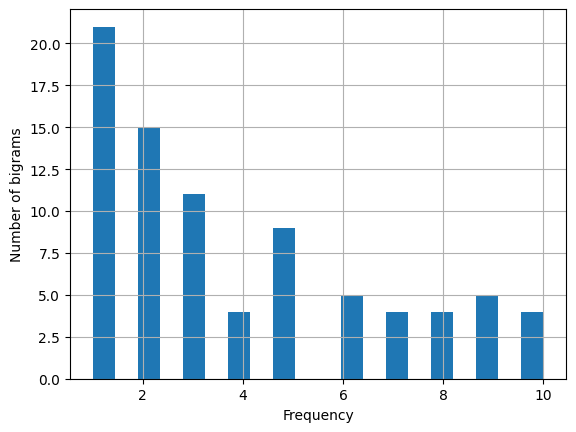

In [41]:
import matplotlib.pyplot as plt

# Plot in a histogram the count of bigrams with frequency less than 10
# add the label to the x-axis and y-axis
threshold = 10
invalid_bigrams = bigrams[bigrams <= threshold]

# Hand cased invalid bigrams
invalid_bigrams = invalid_bigrams.append(pd.Series(['aa', 'ii', 'uu', 'xz']))

# Display trigrams with frequency less than 10
print(invalid_bigrams)

invalid_bigrams.hist(bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of bigrams')

# Filter out invalid bigrams
df['invalid_bigrams'] = df['bigrams'].apply(lambda x: any([bigram in invalid_bigrams for bigram in x]))
df1 = df[df['invalid_bigrams'] == False]


# Print last length of the dataframe and new length of the dataframe
print('Last length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

trigrams
a h d    10
u g b    10
m s k    10
f a f    10
r d g    10
         ..
i k z     1
d c v     1
j l i     1
a j l     1
z y v     1
Name: count, Length: 3524, dtype: int64
Last length of the dataframe:  218182
New length of the dataframe:  208229


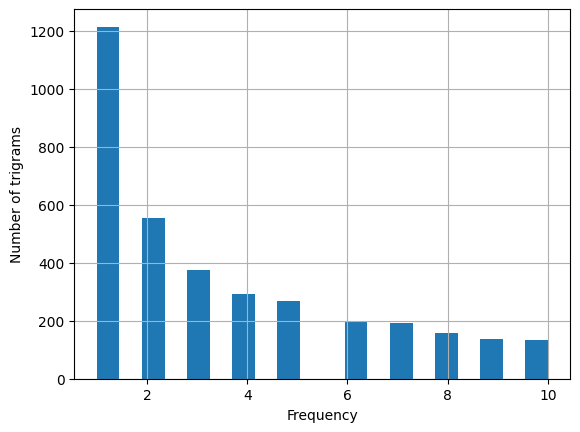

In [42]:
threshold = 10
invalid_trigrams = trigrams[trigrams <= threshold]

# Display trigrams with frequency less than 10
print(invalid_trigrams)

invalid_trigrams.hist(bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of trigrams')

# Filter out invalid trigrams
df['invalid_trigrams'] = df['trigrams'].apply(lambda x: any([trigram in invalid_trigrams for trigram in x]))
df1 = df[df['invalid_trigrams'] == False]

# Print last length of the dataframe and new length of the dataframe
print('Last length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

In [43]:
# Save the filtered words to a new file in ascending order
df['word'].sort_values().to_csv('data/filtered_words.txt', index=False, header=False)



## Augment data

Ideas

- Use the suffix and affixes as words

In [46]:
class SuffixTree:
    def __init__(self):
        self.nodes = {0: {}}  # Root node
        self.num = 0  # Node counter

    def add_suffix(self, suffix):
        current_node = 0
        for char in suffix:
            if char not in self.nodes[current_node]:
                self.num += 1
                self.nodes[current_node][char] = self.num
                self.nodes[self.num] = {}
            current_node = self.nodes[current_node][char]

    def find_common_substrings(self, min_count=2, min_length=3):
        result = []
        stack = [(0, "")]
        while stack:
            node, path = stack.pop()
            if len(path) >= min_length and len(self.nodes[node]) >= min_count:
                result.append(path)
            for char, child_node in self.nodes[node].items():
                stack.append((child_node, path + char))
        return result


def generate_subwords(word_list, min_count=2, min_length=3):
    # Build a suffix tree
    tree = SuffixTree()
    for word in word_list:
        for i in range(len(word)):
            tree.add_suffix(word[i:])

    # Find frequent substrings
    common_substrings = tree.find_common_substrings(min_count, min_length)

    # Generate subwords by splitting words at common substrings
    subwords = set()
    for word in word_list:
        splits = [word]
        for substring in common_substrings:
            splits = [part for split in splits for part in split.split(substring) if part]
            subwords.update(splits)
        subwords.update(splits)

    # Filter out very short subwords
    subwords = {subword for subword in subwords if len(subword) >= min_length}

    return list(subwords)

In [44]:
words = []
with open('data/filtered_words.txt', 'r') as f:
    for line in f:
        words.append(line.strip())
words

['ababdeh',
 'abac',
 'abacas',
 'abaci',
 'abacination',
 'abaciscus',
 'aback',
 'abaco',
 'abacterial',
 'abactinally',
 'abactor',
 'abaculus',
 'abacuses',
 'abada',
 'abaddon',
 'abadengo',
 'abadite',
 'abaft',
 'abagail',
 'abailard',
 'abaised',
 'abaisse',
 'abaka',
 'abakas',
 'abalation',
 'abalienated',
 'abalienation',
 'abalones',
 'abamp',
 'abamperes',
 'abana',
 'abandon',
 'abandoned',
 'abandonee',
 'abandoners',
 'abandonment',
 'abandons',
 'abanet',
 'abanic',
 'abantes',
 'abaptiston',
 'abarambo',
 'abaris',
 'abarticular',
 'abas',
 'abased',
 'abasedness',
 'abasements',
 'abasers',
 'abasgi',
 'abashed',
 'abashedness',
 'abashing',
 'abashlessly',
 'abashments',
 'abasias',
 'abasing',
 'abask',
 'abassieh',
 'abastard',
 'abastral',
 'abatage',
 'abated',
 'abatements',
 'abaters',
 'abatic',
 'abatis',
 'abatises',
 'abator',
 'abats',
 'abattis',
 'abattises',
 'abattoirs',
 'abattue',
 'abature',
 'abave',
 'abayah',
 'abbacies',
 'abbacy',
 'abbai',
 '

In [ ]:
# Generate subwords
subwords = generate_subwords(words, min_count=2, min_length=3)

# Save subwords to a file
output_file = "algorithmic_subwords.txt"
with open(output_file, "w") as f:
    for subword in subwords:
        f.write(f"{subword}\n")

print(f"Subwords saved to {output_file}:")
print(subwords)

## Prepare Test Dataset

I want to test the data against two test

1. Words in nkt library that are not used for training.
    - NOTE: I'm not using these words for training (only for test)
2. Words extracted from practice games
    - NOTE: The should be good enough with these games to indicate that at least is good in the practice games

[nltk_data] Downloading package words to /home/zosov/nltk_data...
[nltk_data]   Package words is already up-to-date!


Number of words that are not in the nltk library: 124412


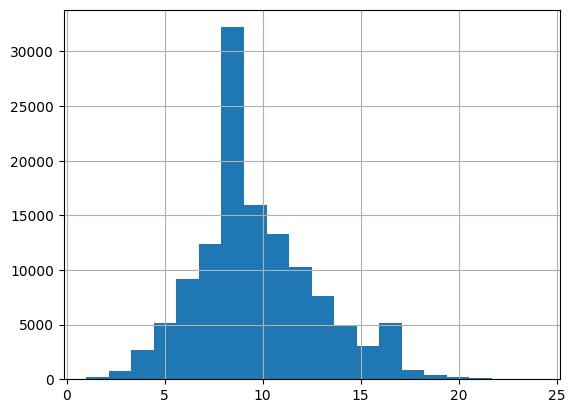

In [51]:
# Load the words from the file and and get the words from nkt library that are not into the words from my file
import nltk
from nltk.corpus import words

raw_words = []
with open('data/filtered_words.txt', 'r') as f:
    for line in f:
        raw_words.append(line.strip())


# Ensure NLTK word list is downloaded
nltk.download('words')

# Get the words from the nltk library
nltk_words = set(words.words())

# lower the words from nltk and filter words only with alphabetic characters
nltk_words = {word.lower() for word in nltk_words if word.isalpha()}

words_not_in_train = nltk_words - set(raw_words)

# Plot the histogram of the length of the words not in train
df = pd.DataFrame(list(words_not_in_train), columns=['word'])
df['length'] = df['word'].apply(len)
df['length'].hist(bins=20)

# Save the words that are not in the nltk library to a file
output_file = "data/test_words_nltk.txt"
with open(output_file, "w") as f:
    for word in words_not_in_train:
        f.write(f"{word}\n")

# Print the length of the words that are not in the nltk library
print(f"Number of words that are not in the nltk library: {len(words_not_in_train)}")

In [21]:
import pandas as pd

# Load the words and calculate the bigrams and trigrams frequencies
raw_words = []
with open('data/filtered_words.txt', 'r') as f:
    for line in f:
        raw_words.append(line.strip())

# Generate bigrams and trigrams
bigrams = {}
trigrams = {}

for word in raw_words:
    for i in range(len(word) - 1):
        bigram = word[i:i + 2]
        bigrams[bigram] = bigrams.get(bigram, 0) + 1
    for i in range(len(word) - 2):
        trigram = word[i:i + 3]
        trigrams[trigram] = trigrams.get(trigram, 0) + 1

# Plot the histogram of the bigrams with frequency less than 10
df = pd.DataFrame(list(bigrams.items()), columns=['bigram', 'frequency'])

# Sort by frequency
df = df.sort_values('frequency')

top_bigrams = df.tail(10).copy()

# Get probabilities
top_bigrams['probability'] = top_bigrams['frequency'] / top_bigrams['frequency'].sum()
top_bigrams


,bigram,frequency,probability
11,at,21319,0.082910
53,ed,21561,0.083852
65,an,23002,0.089456
64,re,23093,0.089810
22,te,24068,0.093601
12,ti,24216,0.094177
14,on,24388,0.094846
34,es,24604,0.095686
9,in,34763,0.135195
23,er,36119,0.140468


# Pretrained Char Embeddings

In [ ]:
# NOTE: Is there a embedding dataset of only words in the web?? Yes

# Load a .txt file separated by spaces where the first colulms is the character and the other columns corresponds
# to the word embedding

# Load the dataset
import pandas as pd
import numpy as np


# Load char embeddings
embeddings_path = 'glove.840B.300d-char.txt'

print('Processing pretrained character embeds...')
char_embeddings = {}
with open(embeddings_path, 'r') as f:
    for line in f:
        line_split = line.strip().split(" ")
        vec = torch.tensor(np.array(line_split[1:], dtype=float))
        char = line_split[0]
        char_embeddings[char] = vec

# For mask use underscore
token_mask = char_embeddings["_"]

# For padding use point
token_pad = char_embeddings["."]

# For CLS used to return an cumulated information for the whole word use #
token_cls = char_embeddings["#"]

# Filter Character Embeddings for char from a-z and three special tokens
char_embeddings = {char: vec for char, vec in char_embeddings.items() if char in "abcdefghijklmnopqrstuvwxyz"}
# Assing char indeces from 0 to 25 to the letters and 26 to 28 to the special tokens
char_indices = {char: i for i, char in enumerate(char_embeddings.keys())}

char_embeddings["_"] = token_mask
char_embeddings["."] = token_pad
char_embeddings["#"] = token_cls

char_indices["_"] = 26
char_indices["."] = 27
char_indices["#"] = 28

# Create an embedding matrix E
embedding_matrix = torch.zeros((len(char_embeddings), 300))
#embedding_matrix = np.random.uniform(-1, 1, (len(chars), 300))
for char, i in char_indices.items():
    #print ("{}, {}".format(char, i))
    embedding_vector = char_embeddings.get(char)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape

## BERT from scratch

In [57]:
import torch
from torch.nn import Module
from transformers import BertConfig, BertModel, BertTokenizer
from transformers.models.bert.modeling_bert import BertEmbeddings, BertEncoder, BertPooler
from torch.utils.data import Dataset, DataLoader

# Custom Character-Level Tokenizer
class CharTokenizer:
    def __init__(self):
        self.vocab = {char: idx for idx, char in enumerate("abcdefghijklmnopqrstuvwxyz", start=1)}
        self.vocab["[PAD]"] = 0
        self.vocab["[UNK]"] = len(self.vocab)
        self.vocab["[CLS]"] = len(self.vocab)
        self.vocab["[MASK]"] = len(self.vocab)
        self.inv_vocab = {v: k for k, v in self.vocab.items()}
        print("Vocab size: ", len(self.vocab))

    def tokenize(self, text):
        return list(text.lower())
    
    def get_ids(self, tokens):
        return [self.vocab.get(t, self.vocab["[UNK]"]) for t in tokens]

    def encode(self, text, max_length):
        tokens = self.tokenize(text)
        token_ids = self.get_ids(tokens)
        return [self.vocab["[CLS]"]] + token_ids[:max_length] + [self.vocab["[PAD]"]] * (max_length - len(token_ids) - 1)
    
    def decode(self, token_ids):
        return ''.join([self.inv_vocab.get(t, "[UNK]") for t in token_ids if t != 0])
    
# Custom Dataset
class WordDataset(Dataset):
    def __init__(self, words, tokenizer, max_length):
        self.words = words
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.words)
    
    def mlm_masking_word(self, sentence):
        # Tokenize the entire sentence
        # tokenized = self.tokenizer(sentence, return_tensors="pt", add_special_tokens=False)
        # tokens = tokenized["input_ids"].squeeze(0)  # Shape: (seq_len,)

        tokens = self.tokenizer.tokenize(sentence)
        token_ids = torch.tensor(self.tokenizer.get_ids(tokens))

        # Generate random probabilities for each token
        probs = torch.rand(token_ids.shape)

        # 15% of the tokens will be considered for masking
        mask_prob = probs < 0.15
        # print("0.15 Masked:",  mask_prob)

        # Initialize labels (original tokens for masked positions, 0 otherwise)
        labels = torch.where(mask_prob, token_ids, torch.zeros_like(token_ids))
        # print("labels:", labels)

        # 80% of masked tokens will be replaced with [MASK]
        mask_replace_prob = torch.rand(token_ids.shape)
        masked_tokens = torch.where(
            mask_prob & (mask_replace_prob < 0.8), 
            torch.tensor(self.tokenizer.vocab['[MASK]']), 
            token_ids
        )
        # print("80% from masked: ", mask_prob & (mask_replace_prob < 0.8))
        # print(masked_tokens)

        # 10% of masked tokens will be replaced with random tokens
        random_replace_prob = torch.rand(token_ids.shape)
        random_tokens = torch.randint(len(self.tokenizer.vocab), token_ids.shape)
        final_tokens = torch.where(
            mask_prob & (mask_replace_prob >= 0.8) & (random_replace_prob < 0.5),
            random_tokens,
            masked_tokens
        )
        # print("10% from masked: ", mask_prob & (mask_replace_prob >= 0.8) & (random_replace_prob < 0.5))
        # print(final_tokens)

        # Tokens not selected for masking remain unchanged
        # final_tokens = torch.where(mask_prob, final_tokens, token_ids)
        # print(final_tokens)

        # Adding special tokens ids and correcting labels
        return self.add_special_tokens(final_tokens, labels)
    

    def add_special_tokens(self, token_ids, labels):
        # Create CLS and PAD tokens
        cls_token = torch.tensor([self.tokenizer.vocab["[CLS]"]])
        pad_token = torch.tensor([self.tokenizer.vocab["[PAD]"]])

        # Add CLS token and truncate or pad token_ids
        truncated_tokens = token_ids[:self.max_length]
        padded_tokens = torch.cat([cls_token, truncated_tokens, pad_token.repeat(self.max_length - truncated_tokens.size(0) - 1)])

        # Add 0 for CLS and PAD tokens to labels
        zero_label = torch.tensor([0])
        truncated_labels = labels[:self.max_length]
        padded_labels = torch.cat([zero_label, truncated_labels, zero_label.repeat(self.max_length - truncated_labels.size(0) - 1)])

        # Outputs
        final_tokens = padded_tokens  # Shape: (max_length,)
        labels = padded_labels         # Shape: (max_length,)
        return final_tokens, labels


    def __getitem__(self, idx):
        word = self.words[idx]

        input_ids, labels = self.mlm_masking_word(word)

        attention_mask = torch.where(input_ids != self.tokenizer.vocab["[PAD]"], 1, 0)

        output = {"bert_input": input_ids,
                  "bert_label": labels,
                  "attention_mask": attention_mask}
        
        return output

# Head using embedding layer
# If I use the 300 Glove embeddings I can use the embedding layer to predict the word
# class MLMHead(torch.nn.Module):
#     def __init__(self, embedding_layer):
#         """
#         :param embedding_layer: Embedding layer from the model
#         """
#         super().__init__()
#         # Use the embedding layer's weight matrix for the linear layer
#         self.linear = torch.nn.Linear(embedding_layer.word_embeddings.weight.size(1),
#                                        embedding_layer.word_embeddings.weight.size(0))
#         self.linear.weight = embedding_layer.word_embeddings.weight  # Share weights
#         self.softmax = torch.nn.LogSoftmax(dim=-1)

#     def forward(self, x):
#         return self.softmax(self.linear(x))

class MLMHead(torch.nn.Module):
    """
    predicting origin token from masked input sequence
    n-class classification problem, n-class = vocab_size
    """

    def __init__(self, hidden, vocab_size):
        """
        :param hidden: output size of BERT model
        :param vocab_size: total vocab size
        """
        super().__init__()
        self.linear = torch.nn.Linear(hidden, vocab_size)
        self.softmax = torch.nn.LogSoftmax(dim=-1)

    def forward(self, x):
        return self.softmax(self.linear(x))

# Custom BERT Architecture with Configurable Layers
class CustomBERT(Module):
    def __init__(self, vocab_size, hidden_size, num_hidden_layers, num_attention_heads, max_position_embeddings, intermediate_size):
        super(CustomBERT, self).__init__()
        self.config = BertConfig(
            vocab_size=vocab_size,
            hidden_size=hidden_size,
            num_hidden_layers=num_hidden_layers,
            num_attention_heads=num_attention_heads,
            max_position_embeddings=max_position_embeddings,
            intermediate_size=intermediate_size,
        )
        self.embeddings = BertEmbeddings(self.config)
        self.encoder = BertEncoder(self.config)
        self.mlm_head = MLMHead(hidden_size, vocab_size)
        # self.pooler = BertPooler(config)

    def forward(self, input_ids, attention_mask):
        embeddings = self.embeddings(input_ids=input_ids)

        # NOTE: I have to add to dimension in between for the attention mask
        # because it will be used to calculatation the attention scores
        attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)

        # Encoder ouputs can return the embeddings in each layer, but here
        # I only interested in the last hidden state
        encoder_outputs = self.encoder(embeddings, attention_mask=attention_mask, return_dict=True)

        # Pooler is used to get the CLS token embedding and apply 
        # a linear transformation to it + tanh activation
        # output = self.pooler(encoder_outputs.last_hidden_state)

        # MLM head output
        output = self.mlm_head(encoder_outputs.last_hidden_state)

        # return encoder_outputs.last_hidden_state, output
        return output

In [105]:
import tqdm
import math


class BERTTrainer:
    def __init__(
        self, 
        model, 
        train_dataloader, 
        test_dataloader=None, 
        lr= 1e-4,
        weight_decay=0.01,
        betas=(0.9, 0.999),
        log_freq=10,
        device='cuda'
        ):

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.train_data = train_dataloader
        self.test_data = test_dataloader

        # Setting the Adam optimizer with hyper-param
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr, betas=betas, weight_decay=weight_decay)

        # Using Negative Log Likelihood Loss function for predicting the masked_token
        self.criterion = torch.nn.NLLLoss(ignore_index=0)
        self.log_freq = log_freq
        print("Total Parameters:", sum([p.nelement() for p in self.model.parameters()]))
    
    def train(self, epoch):
        self.iteration(epoch, self.train_data)

    def test(self, epoch):
        self.iteration(epoch, self.test_data, train=False)

    def iteration(self, epoch, data_loader, train=True):
        
        avg_loss = 0.0
        total_correct = 0  # To track correct predictions
        total_masked = 0   # To track total masked tokens

        mode = "train" if train else "test"

        # progress bar
        data_iter = tqdm.tqdm(
            enumerate(data_loader),
            desc="EP_%s:%d" % (mode, epoch),
            total=len(data_loader),
            bar_format="{l_bar}{r_bar}"
        )

        for i, data in data_iter:

            # batch_data will be sent into the device(GPU or cpu)
            data = {key: value.to(self.device) for key, value in data.items()}

            # forward the model
            mask_lm_output = self.model.forward(data["bert_input"], data["attention_mask"])

            # NLLLoss of predicting masked token word
            # transpose to (m, vocab_size, seq_len) vs (m, seq_len)
            # criterion(mask_lm_output.view(-1, mask_lm_output.size(-1)), data["bert_label"].view(-1))
            
            # NOTE: the mask_lm_output will return -log probability values,
            # then the criterion will only average the values of the masked tokens
            loss = self.criterion(mask_lm_output.transpose(1, 2), data["bert_label"])

            # backward and optimization only in train
            if train:
                # self.optim_schedule.zero_grad()
                self.optimizer.zero_grad()
                loss.backward()
                # self.optim_schedule.step_and_update_lr()
                self.optimizer.step()

            # Update average loss
            avg_loss += loss.item()

            # Calculate predictions and accuracy
            predictions = torch.argmax(mask_lm_output, dim=-1)  # Shape: (batch_size, seq_len)
            correct = (predictions == data["bert_label"]) & (data["bert_label"] != 0)  # Exclude padding
            total_correct += correct.sum().item()
            total_masked += (data["bert_label"] != 0).sum().item()  # Exclude padding tokens

            # Calculate perplexity
            # NOTE: perplexity is not well defined for masked language models like BERT (see summary of the models).
            perplexity = math.exp(avg_loss / (i + 1))

            # Calculate masked token accuracy
            accuracy = total_correct / total_masked if total_masked > 0 else 0

            post_fix = {
                "epoch": epoch,
                "iter": i,
                "avg_loss": round(avg_loss / (i + 1), 3),
                "loss": round(loss.item(), 3),
                "perplexity": round(perplexity, 3),
                "accuracy": round(accuracy, 3)
            }

            if i % self.log_freq == 0:
                data_iter.write(str(post_fix))


        # Final epoch logging
        final_accuracy = total_correct / total_masked if total_masked > 0 else 0
        # print(
        #     f"EP{epoch}, {mode}: \
        #     avg_loss={avg_loss / len(data_iter):.4f}, \
        #     perplexity={math.exp(avg_loss / len(data_iter)):.4f}, \
        #     accuracy={final_accuracy:.4f}"
        # )

In [58]:
# Configuration
hidden_size = 128 # 300 for using Glove embeddings
num_hidden_layers = 4  # Change as needed
num_attention_heads = 4
max_position_embeddings = 32  # Max word length
intermediate_size = 512
max_word_length = 32
batch_size = 16

# Initialize Components
tokenizer = CharTokenizer()
vocab_size = len(tokenizer.vocab)
model = CustomBERT(
    vocab_size=vocab_size, # 4 special tokens
    hidden_size=hidden_size,
    num_hidden_layers=num_hidden_layers,
    num_attention_heads=num_attention_heads,
    max_position_embeddings=max_position_embeddings,
    intermediate_size=intermediate_size,
)


Vocab size:  30


In [61]:
model.config.hidden_size

128

In [109]:
# Configuration
hidden_size = 128 # 300 for using Glove embeddings
num_hidden_layers = 4  # Change as needed
num_attention_heads = 4
max_position_embeddings = 32  # Max word length
intermediate_size = 512
max_word_length = 32
batch_size = 16

# Initialize Components
tokenizer = CharTokenizer()
vocab_size = len(tokenizer.vocab)
model = CustomBERT(
    vocab_size=vocab_size, # 4 special tokens
    hidden_size=hidden_size,
    num_hidden_layers=num_hidden_layers,
    num_attention_heads=num_attention_heads,
    max_position_embeddings=max_position_embeddings,
    intermediate_size=intermediate_size,
)


# # Example Dataset
# words = ["apple", "banana", "cherry", "date"]

# Load the dataset in a list from a .txt file
words = []
with open('words_250000_train.txt', 'r') as f:
    for line in f:
        words.append(line.strip())

train_data = WordDataset(words, tokenizer, max_word_length)
train_loader = DataLoader(train_data,
                          batch_size=batch_size, 
                          shuffle=True,
                          pin_memory=True)

Vocab size:  30


In [110]:
len(train_data)

227300

In [108]:
bert_trainer = BERTTrainer(model, train_loader, device='cpu')
epochs = 20

for epoch in range(epochs):
  bert_trainer.train(epoch)

Total Parameters: 805406


EP_train:0: 100%|| 1/1 [00:00<00:00, 46.51it/s]


{'epoch': 0, 'iter': 0, 'avg_loss': 3.663, 'loss': 3.663, 'perplexity': 38.97, 'accuracy': 0.0}


EP_train:1: 100%|| 1/1 [00:00<00:00, 63.48it/s]


{'epoch': 1, 'iter': 0, 'avg_loss': 3.296, 'loss': 3.296, 'perplexity': 26.999, 'accuracy': 0.0}


EP_train:2: 100%|| 1/1 [00:00<00:00, 61.96it/s]


{'epoch': 2, 'iter': 0, 'avg_loss': 3.191, 'loss': 3.191, 'perplexity': 24.32, 'accuracy': 0.0}


EP_train:3: 100%|| 1/1 [00:00<00:00, 51.27it/s]


{'epoch': 3, 'iter': 0, 'avg_loss': 3.578, 'loss': 3.578, 'perplexity': 35.812, 'accuracy': 0.0}


EP_train:4: 100%|| 1/1 [00:00<00:00, 62.68it/s]


{'epoch': 4, 'iter': 0, 'avg_loss': 3.588, 'loss': 3.588, 'perplexity': 36.177, 'accuracy': 0.0}


EP_train:5: 100%|| 1/1 [00:00<00:00, 58.93it/s]


{'epoch': 5, 'iter': 0, 'avg_loss': 2.541, 'loss': 2.541, 'perplexity': 12.694, 'accuracy': 0.0}


EP_train:6: 100%|| 1/1 [00:00<00:00, 63.34it/s]


{'epoch': 6, 'iter': 0, 'avg_loss': 3.241, 'loss': 3.241, 'perplexity': 25.559, 'accuracy': 0.0}


EP_train:7: 100%|| 1/1 [00:00<00:00, 64.09it/s]


{'epoch': 7, 'iter': 0, 'avg_loss': 3.507, 'loss': 3.507, 'perplexity': 33.335, 'accuracy': 0.0}


EP_train:8: 100%|| 1/1 [00:00<00:00, 63.43it/s]


{'epoch': 8, 'iter': 0, 'avg_loss': 2.503, 'loss': 2.503, 'perplexity': 12.224, 'accuracy': 0.0}


EP_train:9: 100%|| 1/1 [00:00<00:00, 68.36it/s]


{'epoch': 9, 'iter': 0, 'avg_loss': 2.882, 'loss': 2.882, 'perplexity': 17.848, 'accuracy': 0.0}


EP_train:10: 100%|| 1/1 [00:00<00:00, 68.80it/s]


{'epoch': 10, 'iter': 0, 'avg_loss': 3.442, 'loss': 3.442, 'perplexity': 31.238, 'accuracy': 0.0}


EP_train:11: 100%|| 1/1 [00:00<00:00, 66.41it/s]


{'epoch': 11, 'iter': 0, 'avg_loss': 2.925, 'loss': 2.925, 'perplexity': 18.642, 'accuracy': 0.2}


EP_train:12: 100%|| 1/1 [00:00<00:00, 67.27it/s]


{'epoch': 12, 'iter': 0, 'avg_loss': 2.99, 'loss': 2.99, 'perplexity': 19.878, 'accuracy': 0.143}


EP_train:13: 100%|| 1/1 [00:00<00:00, 68.61it/s]


{'epoch': 13, 'iter': 0, 'avg_loss': 1.499, 'loss': 1.499, 'perplexity': 4.476, 'accuracy': 1.0}


EP_train:14: 100%|| 1/1 [00:00<00:00, 60.64it/s]


{'epoch': 14, 'iter': 0, 'avg_loss': nan, 'loss': nan, 'perplexity': nan, 'accuracy': 0}


EP_train:15: 100%|| 1/1 [00:00<00:00, 68.91it/s]


{'epoch': 15, 'iter': 0, 'avg_loss': 3.983, 'loss': 3.983, 'perplexity': 53.67, 'accuracy': 0.0}


EP_train:16: 100%|| 1/1 [00:00<00:00, 72.89it/s]


{'epoch': 16, 'iter': 0, 'avg_loss': 1.727, 'loss': 1.727, 'perplexity': 5.623, 'accuracy': 1.0}


EP_train:17: 100%|| 1/1 [00:00<00:00, 72.46it/s]


{'epoch': 17, 'iter': 0, 'avg_loss': 2.716, 'loss': 2.716, 'perplexity': 15.123, 'accuracy': 0.0}


EP_train:18: 100%|| 1/1 [00:00<00:00, 57.23it/s]


{'epoch': 18, 'iter': 0, 'avg_loss': 2.67, 'loss': 2.67, 'perplexity': 14.447, 'accuracy': 0.333}


EP_train:19: 100%|| 1/1 [00:00<00:00, 72.07it/s]

{'epoch': 19, 'iter': 0, 'avg_loss': 1.594, 'loss': 1.594, 'perplexity': 4.923, 'accuracy': 1.0}


## Design a valid metric to measure how hangman performs

## Creating the OpenAI Gym enviornment


In [ ]:
# NOTE: Probably will no be necessary to change one character 
# randomly and always to mask at least one character

In [57]:
import gymnasium as gym
from gymnasium import spaces

import numpy as np
from collections import Counter, defaultdict
import string

class HangmanEnv(gym.Env):
    def __init__(self, word_list):
        super(HangmanEnv, self).__init__()

        self.word_list = word_list
        self.vocab = string.ascii_lowercase
        self.max_lives = 6


        self.top_bigrams, self.top_trigrams = self._calculate_top_n_gram()

        # Observation space: Current word state and one-hot vector for tried letters
        self.observation_space = spaces.Dict({
            "word_state": spaces.MultiDiscrete([len(self.vocab) + 1] * 25),
            "tried_letters": spaces.MultiBinary(len(self.vocab))
        })

        # Action space: Choosing a letter from the vocabulary
        self.action_space = spaces.Discrete(len(self.vocab))

        # Precompute global letter frequencies
        letter_counts = Counter("".join(self.word_list))
        total_letters = sum(letter_counts.values())
        self.global_letter_frequencies = {
            letter: count / total_letters for letter, count in letter_counts.items()
        }

    def reset(self, word_id=None):
        self.target_word = np.random.choice(self.word_list)
        if word_id is not None:
            self.target_word = self.word_list[word_id]
        self.word_state = ["_"] * len(self.target_word)
        self.tried_letters = set()
        self.lives = self.max_lives
        
        return self._get_obs()

    def step(self, action):
        letter = self.vocab[action]
        reward = 0

        if letter in self.tried_letters:
            reward = -2  # Penalty for repeating a letter
        else:
            self.tried_letters.add(letter)
            if letter in self.target_word:
                # Correct guess: Update word state and calculate reward
                reward += self._calculate_correct_guess_reward(letter)
                for i, char in enumerate(self.target_word):
                    if char == letter:
                        self.word_state[i] = letter

                # Check if the game is won
                if "_" not in self.word_state:
                    return self._get_obs(), 50, True, {"result": "win"}
            else:
                # Incorrect guess: Deduct a life and apply penalty
                self.lives -= 1
                reward -= 5

                # Check if the game is lost
                if self.lives <= 0:
                    return self._get_obs(), reward, True, {"result": "lose"}

        return self._get_obs(), reward, False, {}
    
    def _calculate_top_n_gram(self, n = 50):
        # Calculate all the bigrams and trigrams frequencies in the wordlist
        bigram_frequencies = defaultdict(int)

        for word in self.word_list:
            for i in range(1, len(word)):
                bigram_frequencies[word[i - 1] + word[i]] += 1

        trigram_frequencies = defaultdict(int)

        for word in self.word_list:
            for i in range(2, len(word)):
                trigram_frequencies[word[i - 2] + word[i - 1] + word[i]] += 1

        # Divide to the total number of bigrams and trigrams
        total_bigrams = sum(bigram_frequencies.values())
        total_trigrams = sum(trigram_frequencies.values())

        bigram_frequencies = {k: v / total_bigrams for k, v in bigram_frequencies.items()}
        trigram_frequencies = {k: v / total_trigrams for k, v in trigram_frequencies.items()}

        # Take the top 50 bigrams and trigrams
        top_bigrams = dict(sorted(bigram_frequencies.items(), key=lambda item: item[1], reverse=True)[:n])
        top_trigrams = dict(sorted(trigram_frequencies.items(), key=lambda item: item[1], reverse=True)[:n])

        return list(top_bigrams.keys()), list(top_trigrams.keys())


    def _calculate_correct_guess_reward(self, letter, scale=1):
        # Reward for correct guess based on global and relative frequencies
        global_reward = self.global_letter_frequencies.get(letter, 0)
        
        # Calculate relative frequencies for current pattern
        pattern = "".join(
            c if c != "_" else "." for c in self.word_state
        )
        matching_words = [w for w in self.word_list if len(w) == len(self.target_word) and all(
            p == c or p == "." for p, c in zip(pattern, w))]
        relative_letter_counts = Counter("".join(matching_words))
        total_relative_letters = sum(relative_letter_counts.values())
        relative_frequencies = {
            l: (relative_letter_counts.get(l, 0) + 1) / (total_relative_letters + len(self.vocab))
            for l in self.vocab
        }

        relative_reward = relative_frequencies[letter] * scale

        # Additional reward for matching bigrams or trigrams with the current letter

        temp_dict = {k : 0.5 for k in self.top_bigrams}
        bigram_bonus = sum(
            temp_dict.get(self.word_state[i - 1] + letter, 0)
            for i in range(1, len(self.word_state)) if self.word_state[i - 1] != "_"
        )

        temp_dict = {k : 1. for k in self.top_trigrams}
        trigram_bonus = sum(
            temp_dict.get("".join(self.word_state[0:2]) + letter, 0)
            for i in range(2, len(self.word_state)) if "".join(self.word_state[0:2]) != "__"
        )

        return global_reward + relative_reward + bigram_bonus + trigram_bonus

    def _get_obs(self):
        # Encode word state and tried letters as observations
        word_state_encoded = [
            self.vocab.index(char) if char in self.vocab else len(self.vocab)
            for char in self.word_state
        ] + [len(self.vocab)] * (25 - len(self.word_state))
        
        tried_letters_encoded = [1 if char in self.tried_letters else 0 for char in self.vocab]

        return {
            "word_state": np.array(word_state_encoded, dtype=np.int32),
            "tried_letters": np.array(tried_letters_encoded, dtype=np.int32)
        }

    def render(self, mode="human"):
        if mode == "human":
            print("Word:", " ".join(self.word_state))
            print("Tried Letters:", " ".join(sorted(self.tried_letters)))
            print(f"Lives Left: {self.lives}")

    def close(self):
        pass

# Example usage
if __name__ == "__main__":
    word_list = ["apple", "banana", "cherry", "date"]
    id2char = {i: c for i, c in enumerate(string.ascii_lowercase)}

    env = HangmanEnv(word_list)
    obs = env.reset()
    env.render()

    done = False
    while not done:
        action = env.action_space.sample()  # Random action
        obs, reward, done, info = env.step(action)
        env.render()
        # Map action to letter
        print(f"Observation: {obs}")
        print(f"Action: {id2char[action]} Reward: {reward}")

    print("Game Over:", info)


Word: _ _ _ _ _ _
Tried Letters: 
Lives Left: 6
Word: _ _ _ _ _ _
Tried Letters: z
Lives Left: 5
Observation: {'word_state': array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26], dtype=int32), 'tried_letters': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int32)}
Action: z Reward: -5
Word: _ _ _ _ _ _
Tried Letters: z
Lives Left: 5
Observation: {'word_state': array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26], dtype=int32), 'tried_letters': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int32)}
Action: z Reward: -2
Word: _ _ _ _ _ _
Tried Letters: r z
Lives Left: 4
Observation: {'word_state': array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26], dtype=int32), 'tried_letters': array([0, 0, 0, 0, 0, 0, 

## Metric to test performance


In [ ]:
import torch
import string
import numpy as np

# Define a function to map the model's predictions to the environment's action space
def get_model_action(model, observation, id2char, char2id):
    # Prepare input for the model
    word_state = observation["word_state"]
    tried_letters = observation["tried_letters"]

    # Convert to PyTorch tensors
    word_state_tensor = torch.tensor(word_state).unsqueeze(0)  # Add batch dimension
    tried_letters_tensor = torch.tensor(tried_letters).unsqueeze(0)

    # Get the model's prediction (logits)
    with torch.no_grad():
        logits = model(word_state_tensor)

    # Mask logits for already tried letters
    mask = torch.tensor(tried_letters).bool()
    logits[0, mask] = -float('inf')  # Mask tried letters

    # Choose the action with the highest score
    action = torch.argmax(logits, dim=-1).item()
    return action

# Evaluate the model on the dataset
def evaluate_model_on_env(model, env, id2char, char2id):
    successes = 0
    total_games = len(env.word_list)

    for word_id in range(total_games):
        obs = env.reset(word_id=word_id)
        done = False

        while not done:
            # Get the model's action
            action = get_model_action(model, obs, id2char, char2id)

            # Step through the environment
            obs, reward, done, info = env.step(action)

        # Check if the game was won
        if info.get("result") == "win":
            successes += 1

    print(f"Model succeeded in {successes} out of {total_games} games.")
    return successes, total_games

# Example usage
if __name__ == "__main__":
    # Initialize environment and model
    word_list = ["apple", "banana", "cherry", "date"]
    env = HangmanEnv(word_list)

    vocab_size = len(string.ascii_lowercase)
    hidden_size = 768
    num_hidden_layers = 12
    num_attention_heads = 12
    max_position_embeddings = 512
    intermediate_size = 3072

    # Load the trained CustomBERT model
    model = CustomBERT(
        vocab_size=vocab_size,
        hidden_size=hidden_size,
        num_hidden_layers=num_hidden_layers,
        num_attention_heads=num_attention_heads,
        max_position_embeddings=max_position_embeddings,
        intermediate_size=intermediate_size
    )
    model.load_state_dict(torch.load("path_to_trained_model.pth"))  # Load trained weights
    model.eval()  # Set to evaluation mode

    # Create mappings for actions
    id2char = {i: c for i, c in enumerate(string.ascii_lowercase)}
    char2id = {c: i for i, c in enumerate(string.ascii_lowercase)}

    # Evaluate the model
    evaluate_model_on_env(model, env, id2char, char2id)
